In [1]:
import os

In [2]:
print(os.listdir('../input'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
candf = pd.read_csv('haberman.csv',header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])


In [11]:
candf.sample(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
76,44,61,0,1
231,61,68,1,2
164,53,60,2,1
171,54,59,7,1
32,38,60,1,1


In [12]:
candf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year_of_treatment              306 non-null    int64
 2   positive_lymph_nodes           306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
isnull(candf)

NameError: name 'isnull' is not defined

In [16]:
candf['survival_status_after_5_years'].unique()

array([1, 2], dtype=int64)

In [20]:
candf['survival_status_after_5_years'] = candf['survival_status_after_5_years'].map({1:'yes',2:'no'})


In [19]:
candf['survival_status_after_5_years'].astype

<bound method NDFrame.astype of 0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: survival_status_after_5_years, Length: 306, dtype: int64>

In [21]:
candf

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
...,...,...,...,...
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no


In [23]:
candf['survival_status_after_5_years'] = candf['survival_status_after_5_years'].astype('category')

In [28]:
candf['survival_status_after_5_years'].astype

<bound method NDFrame.astype of 0      <bound method NDFrame.astype of 0      <bound ...
1      <bound method NDFrame.astype of 0      <bound ...
2      <bound method NDFrame.astype of 0      <bound ...
3      <bound method NDFrame.astype of 0      <bound ...
4      <bound method NDFrame.astype of 0      <bound ...
                             ...                        
301    <bound method NDFrame.astype of 0      <bound ...
302    <bound method NDFrame.astype of 0      <bound ...
303    <bound method NDFrame.astype of 0      <bound ...
304    <bound method NDFrame.astype of 0      <bound ...
305    <bound method NDFrame.astype of 0      <bound ...
Name: survival_status_after_5_years, Length: 306, dtype: object>

In [29]:
candf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            306 non-null    int64 
 1   year_of_treatment              306 non-null    int64 
 2   positive_lymph_nodes           306 non-null    int64 
 3   survival_status_after_5_years  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [31]:
candf.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [32]:
candf['year_of_treatment'].std()

3.2494046632238507

C:\Users\VASIM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


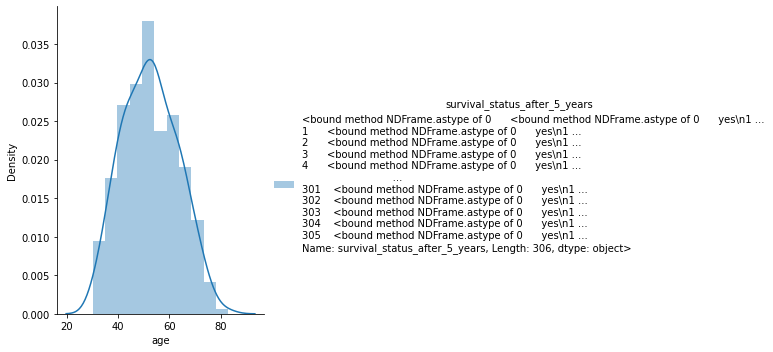

C:\Users\VASIM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


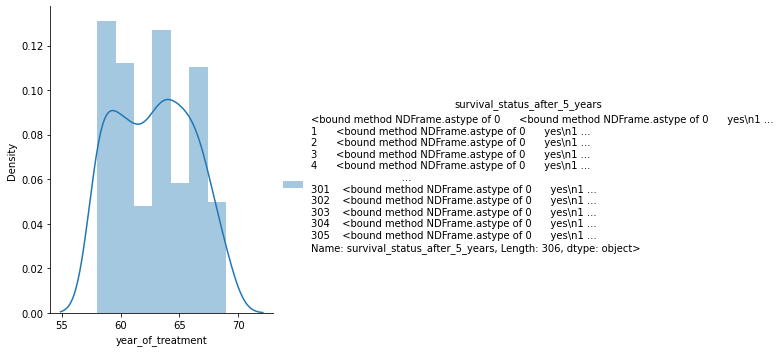

C:\Users\VASIM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


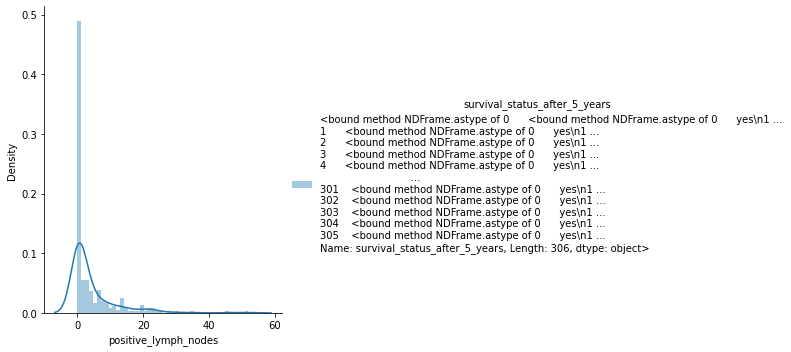

In [64]:
for idx, feature in enumerate(list(candf.columns)[:-1]):
    fg = sns.FacetGrid(candf,hue = 'survival_status_after_5_years',height = 5)
    fg.map(sns.distplot,feature).add_legend()
    plt.show()

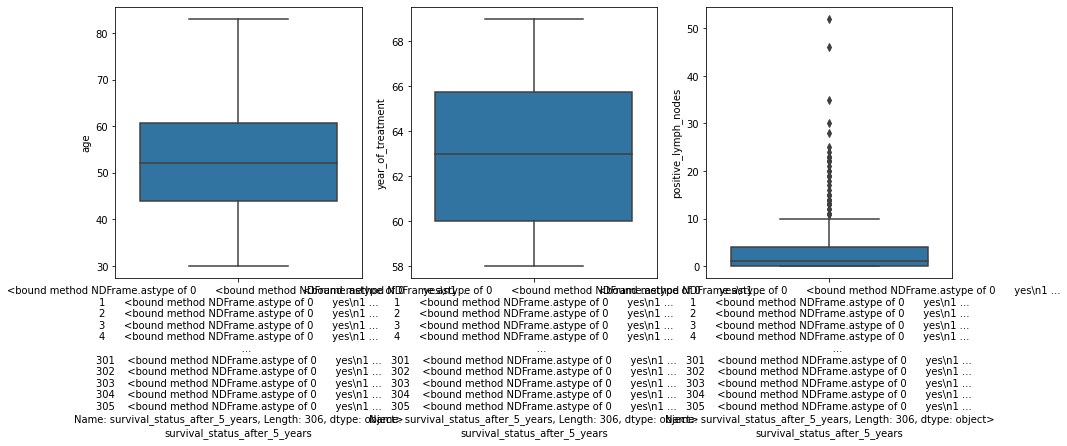

In [71]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for idx,feature in enumerate(candf.columns[:-1]):
    sns.boxplot(x = 'survival_status_after_5_years',y= feature, data = candf,ax = axes[idx])
plt.show()

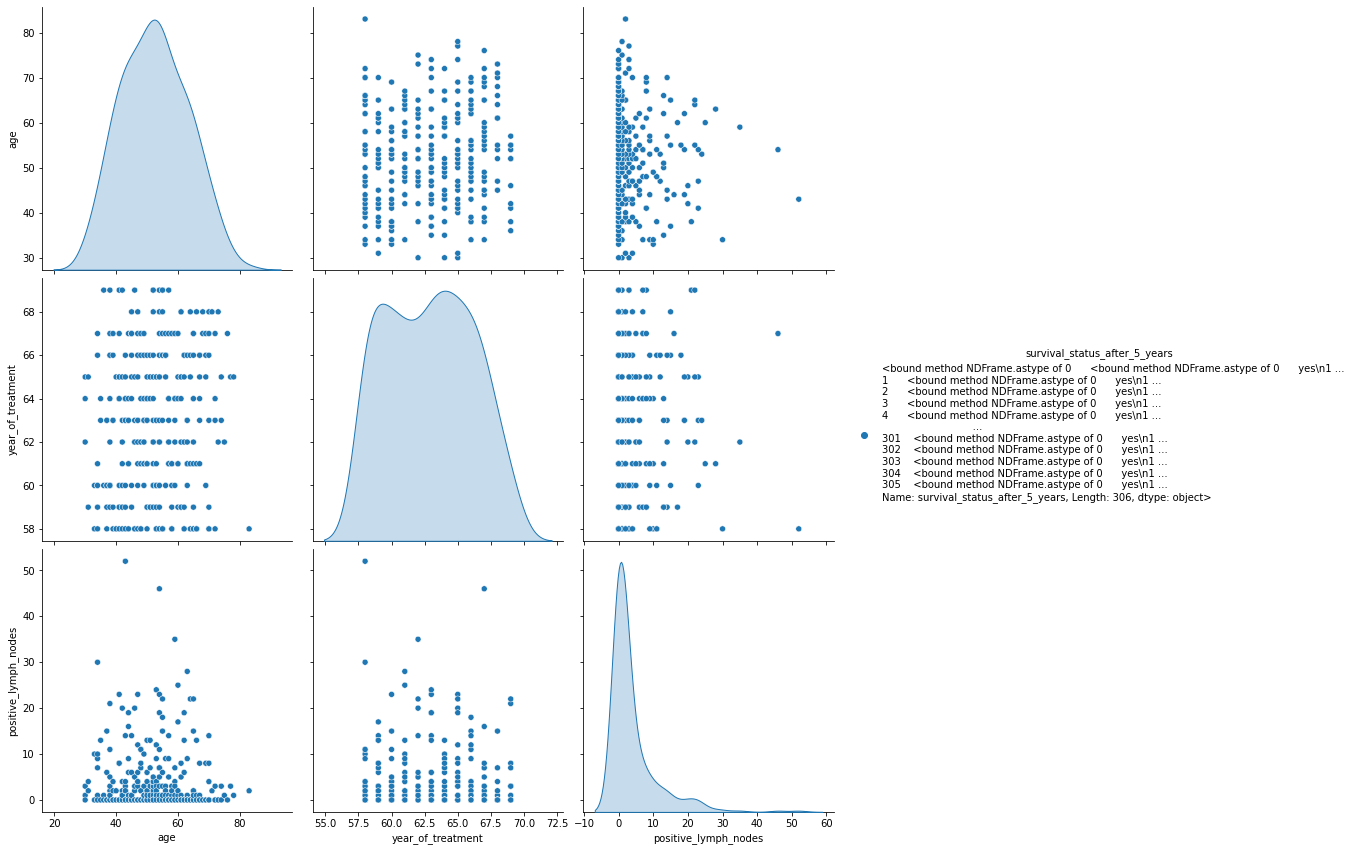

In [74]:
sns.pairplot(candf,hue= 'survival_status_after_5_years',height=4 )
plt.show()